<a href="https://colab.research.google.com/github/Kingsyel/Embeddings_Text_Image_Docs/blob/main/Tokenizer_and_word_embeddings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEXT EMBEDDINGS**

Below is a text embedding using package tokenizer from tensorflow

In [1]:
# Tokenize the input string data
from tensorflow.keras.preprocessing.text import Tokenizer
data = [
"The earth is spherical.",
"The earth is a planet.",
"I like to eat at a restaurant."]
# Filter the punctiations, tokenize the words and index them to integers
tokenizer = Tokenizer(num_words=15, filters = '!"#$%&()*+,-./:;<=>?[\\]^_\\{\\}|~\t\n', lower=True,
split=' ')
tokenizer.fit_on_texts(data)
# Translate each sentence into its word-level IDs, and then one-hot encode those IDs
ID_sequences = tokenizer.texts_to_sequences(data)
binary_sequences = tokenizer.sequences_to_matrix(ID_sequences)
print("ID dictionary:\n", tokenizer.word_index)
print("\nID sequences:\n", ID_sequences)
print("\n One-hot encoded sequences:\n", binary_sequences )

ID dictionary:
 {'the': 1, 'earth': 2, 'is': 3, 'a': 4, 'spherical': 5, 'planet': 6, 'i': 7, 'like': 8, 'to': 9, 'eat': 10, 'at': 11, 'restaurant': 12}

ID sequences:
 [[1, 2, 3, 5], [1, 2, 3, 4, 6], [7, 8, 9, 10, 11, 4, 12]]

 One-hot encoded sequences:
 [[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]]


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 104.8/104.8MB downloaded
words most similar to 'computer' with word2vec and glove respectively:
[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868)]
[('camera', 0.907833456993103),
 ('cell', 0.891890287399292),
 ('server', 0.874466598033905)]
'2d projection of some common words of both models'


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


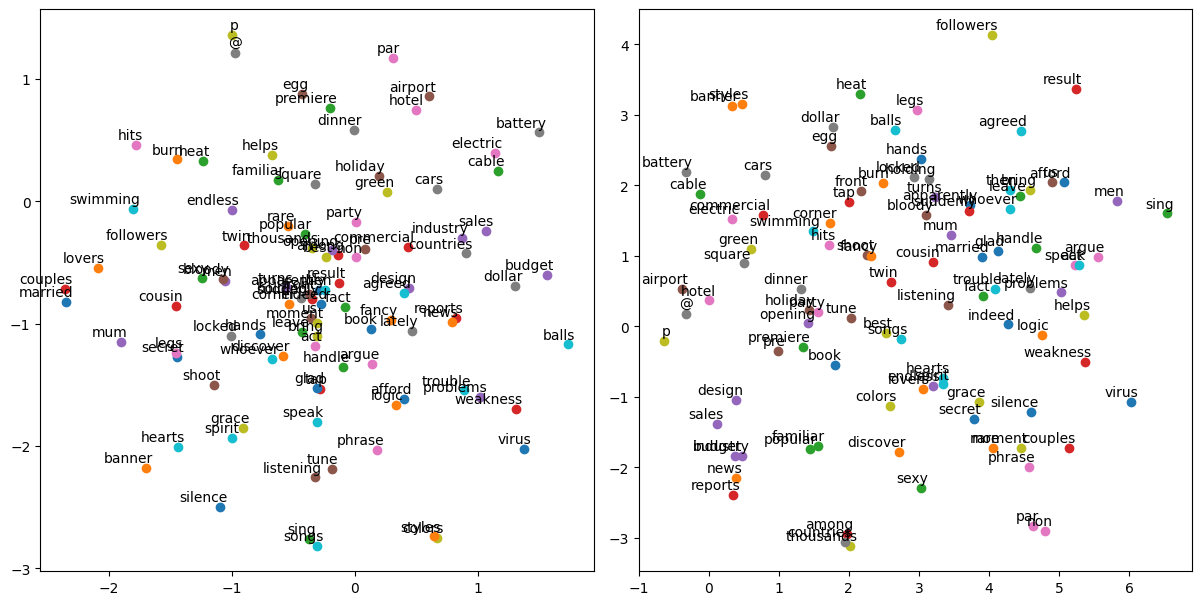

In [2]:
from gensim.models import Word2Vec
import gensim.downloader as api
import pprint
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
def tsne_plot(models, words, seed=23):
  "Creates a TSNE models & plots for multiple word models for the given words"
  plt.figure(figsize=(len(models)*30, len(models)*30))
  model_ix = 0
  for model in models:
    labels = []
    tokens = []
    for word in words:
      tokens.append(model[word])
      labels.append(word)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=seed)
    new_values = tsne_model.fit_transform(np.array(tokens))
    x = []
    y = []
    for value in new_values:
      x.append(value[0])
      y.append(value[1])
    model_ix +=1
    plt.subplot(10, 10, model_ix)
    for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
  plt.tight_layout()
  plt.show()
v2w_model = api.load('word2vec-google-news-300')
glove_model = api.load('glove-twitter-25')
print("words most similar to 'computer' with word2vec and glove respectively:")
pprint.pprint( v2w_model.most_similar("computer")[:3])
pprint.pprint( glove_model.most_similar("computer")[:3])
pprint.pprint("2d projection of some common words of both models")
sample_common_words= list(set(v2w_model.index_to_key[100:10000])
& set(glove_model.index_to_key[100:10000]))[:100]
tsne_plot([v2w_model, glove_model], sample_common_words)

**Document Embeddings:**

Example below is a shallow Bag-of-Words example known as **Doc2Vec** inspired by Word2Vec used in word embedding above

In [6]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
#train model on a sequence of documents tagged with their IDs
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=8, window=3, min_count=1, workers=6)
# persist model to disk, and load it to infer on new documents
model_file = get_tmpfile("Doc2Vec_v1")
model.save(model_file)
model = Doc2Vec.load(model_file)
model.infer_vector(["Football", "game"])

array([ 0.0399865 , -0.0168466 ,  0.03089374, -0.06034418,  0.00651494,
       -0.01714774,  0.05724307,  0.05777027], dtype=float32)

In [8]:
model.infer_vector(["Machine", "learning"])

array([-0.03269488, -0.00582307, -0.05551403,  0.04502184,  0.00964907,
       -0.00468139,  0.02069753,  0.04027379], dtype=float32)